## MNIST 숫자 이미지 인식 문제 -> Regression OR Classification?

In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


### MNIST 데이터 로딩 (train/test split이 바로 지원)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 이미지 4개를 테스트로 그레이 스케일로 출력

In [4]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

/Users/keeyong/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### 이미지 정보를 이제 일차원 리스트로 변경

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_cnv = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_cnv = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print(num_pixels)

784


### 이미지의 스케일을 0-255에서 0-1로 변경

In [8]:
X_train_cnv = X_train_cnv / 255
X_test_cnv = X_test_cnv / 255

### Classification 결과에 대해 One-hot encoding 수행 

In [9]:
print(y_test)

[7 2 1 ..., 4 5 6]


In [10]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
print(y_test)

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


### NN 모델 빌딩

In [13]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 텐서보드 추가하기:
로그 디렉토리를 지정하여 텐서 보드를 실행가능: "tensorboard --logdir /Users/keeyong/Documents/log" 그리고나서 http://0.0.0.0:6006 에서 관찰가능

In [16]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='/Users/keeyong/Documents/log', histogram_freq=0,
                          write_graph=True, write_images=False)

# 모델 학습
model.fit(X_train_cnv,
    y_train,
    epochs=10,
    batch_size=200,
    verbose=2,
    callbacks=[tensorboard]
)

# 모델 정확도 분석 (scikit-learn의 score에 해당)
scores = model.evaluate(X_test_cnv, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
4s - loss: 0.0061 - acc: 0.9990
Epoch 2/10
4s - loss: 0.0051 - acc: 0.9991
Epoch 3/10
4s - loss: 0.0043 - acc: 0.9994
Epoch 4/10
4s - loss: 0.0020 - acc: 0.9999
Epoch 5/10
4s - loss: 0.0019 - acc: 0.9997
Epoch 6/10
4s - loss: 0.0115 - acc: 0.9962
Epoch 7/10
4s - loss: 0.0106 - acc: 0.9967
Epoch 8/10
4s - loss: 0.0037 - acc: 0.9992
Epoch 9/10
4s - loss: 0.0013 - acc: 0.9999
Epoch 10/10
4s - loss: 4.7879e-04 - acc: 1.0000
Baseline Error: 1.56%


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


#### Now let's try to load a digit image and see how it works

In [ ]:
from PIL import Image, ImageFilter
import PIL.ImageOps 
from numpy import array

class ScaleUtils():
    def __init__(self, p, h=28, w=28):
        self.im = Image.open(p)
        self.size = (h,w)
    def toGrey(self):
        self.im = self.im.convert("L")
        return self
    def resize(self):
        self.im = self.im.resize(self.size)
        return self
    def invert(self):
        self.im = PIL.ImageOps.invert(self.im)
        return self
    def getArray(self):
        return array(self.im)
    def getImage(self):
        return self.im
    def run(self):
        return self.toGrey().resize().getArray()
    
# this particular one requires invert
ScaleUtils("/Users/khan/Desktop/test_8_digit.png").toGrey().resize().invert().getImage().save("output.jpg", "JPEG")

### Predict using one from training set

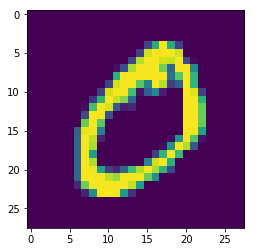

1/1 [==============================] - 0s
[0]


In [18]:
plt.imshow(X_train[1])
plt.show()

input = X_train_cnv[1]
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)

In [ ]:
# 테스트 이미지가 output.jpg인 경우
from scipy.misc import imread
import matplotlib.pyplot as plt

im = imread("output.jpg")
plt.imshow(im)
plt.show()

input = im
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)